# Student Performance Indicator

### Lifecycle of project
- Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Model ranking

## 1) Problem Statement
- This project looks to understand the relationship between student's test scores and variables such as gender, ehtnicity, parental level of education, lunch and test preparation course.

## 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
- The dataset contains 1000 rows and 8 columns.

## 2.1 Importing packages

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import CSV as a Pandas Dataframe

In [29]:
df = pd.read_csv('data/stud.csv')

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2 Dataset Information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3) Data checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1 Check Mising Values

In [31]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

## 3.2 Check Duplicates

In [32]:
df.duplicated().sum()

0

There are no duplicates in the dataset

## 3.3 Check data types

In [33]:
# check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data types are fine to proceed

## 3.4 Checking the number of unique values of each column

In [34]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5) Checking stats of dataset

In [35]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Initial thoughts

- Average (mean) score across all 3 subjects quite similar: 66 - 69
- Student scores across all 3 subjects don't vary too much from mean and distribution of std is quite similar too: 14.6 - 15.2
- Lowest score of 0 recorded for maths, 10 for writing and 17 for reading 

## 3.6) Data exploration

In [36]:

print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [44]:
# define numerical and categorical columns
numeric = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f"We have {len(numeric)} numeric columns: ", numeric)
print(f"We have {len(categorical)} categorical columns: ", categorical)

We have 3 numeric columns:  ['math_score', 'reading_score', 'writing_score']
We have 5 categorical columns:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Aggregating columns for total score and average

In [45]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
reading_full = len(df[df['reading_score'] == 100])
math_full = len(df[df['math_score'] == 100])
writing_full = len(df[df['writing_score'] == 100])

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [51]:
reading_less_20 = len(df[df['reading_score'] <= 20])
writing_less_20 = len(df[df['writing_score'] <= 20])
math_less_20 = len(df[df['math_score'] <= 20])

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## 4) Exploring data visually

## 4.1 Visualise average score distribution
- Histogram
- Kernel Distribution Function (KDE)

## Histogram & KDE

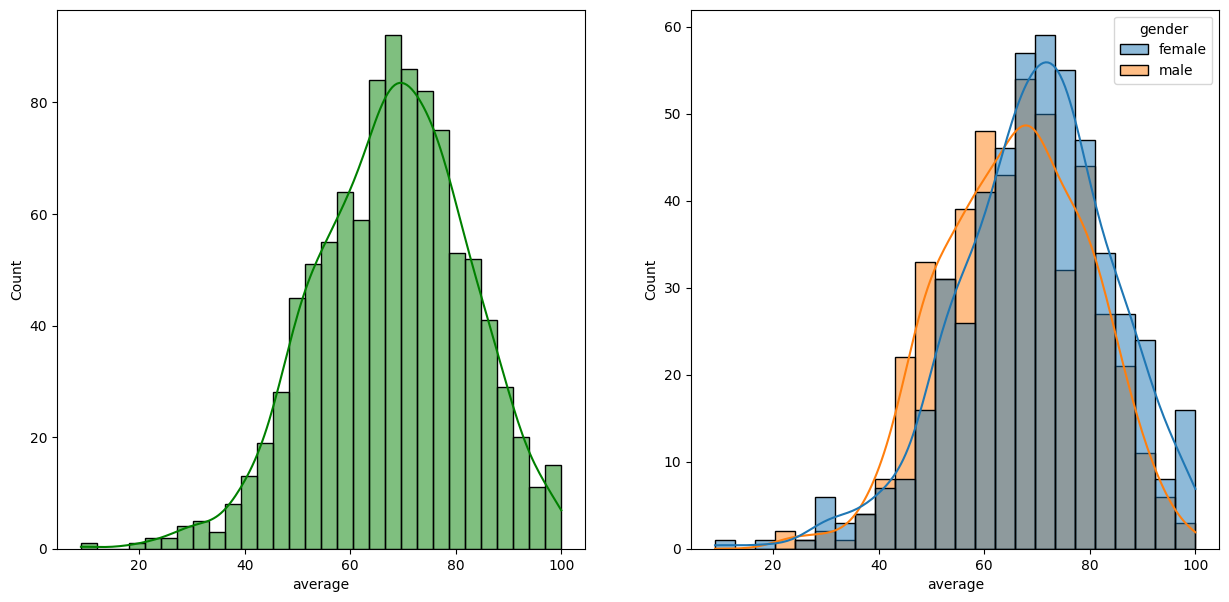

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

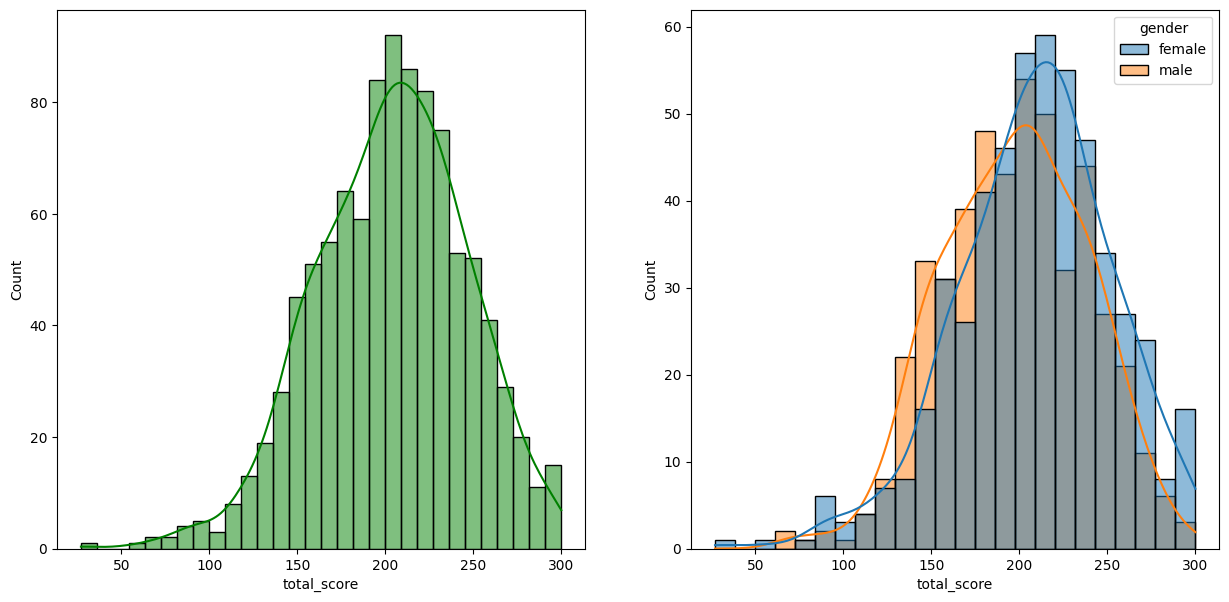

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

On average, females tend to outperform males

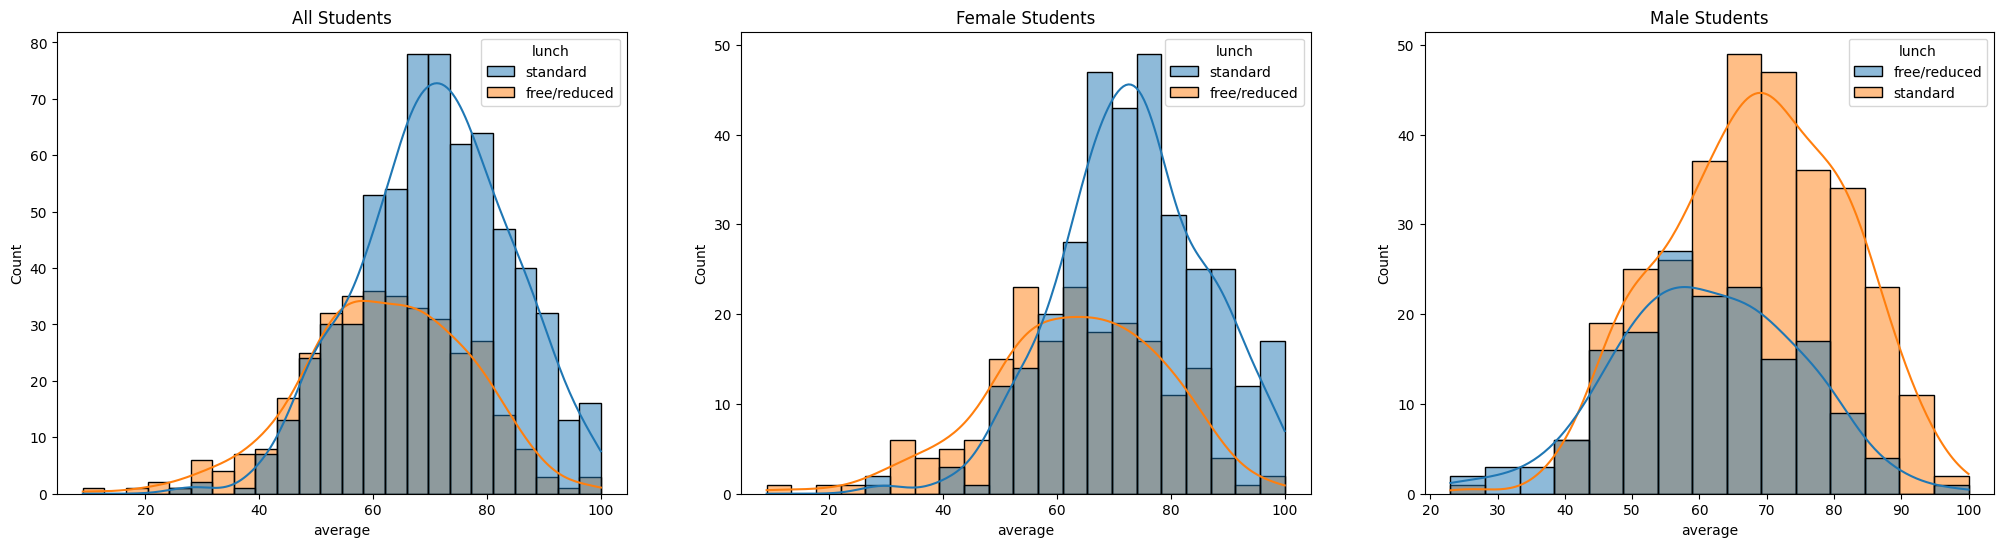

In [58]:
# Create the subplots
plt.subplots(1, 3, figsize=(25, 6))

# First subplot: All students
plt.subplot(131)
ax1 = sns.histplot(data=df, x='average', kde=True, hue='lunch')
ax1.set_title('All Students')

# Second subplot: Female students
plt.subplot(132)
ax2 = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
ax2.set_title('Female Students')

# Third subplot: Male students
plt.subplot(133)
ax3 = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
ax3.set_title('Male Students')

# Display the plots
plt.show()

Standard lunch helps perform well in exams across genders

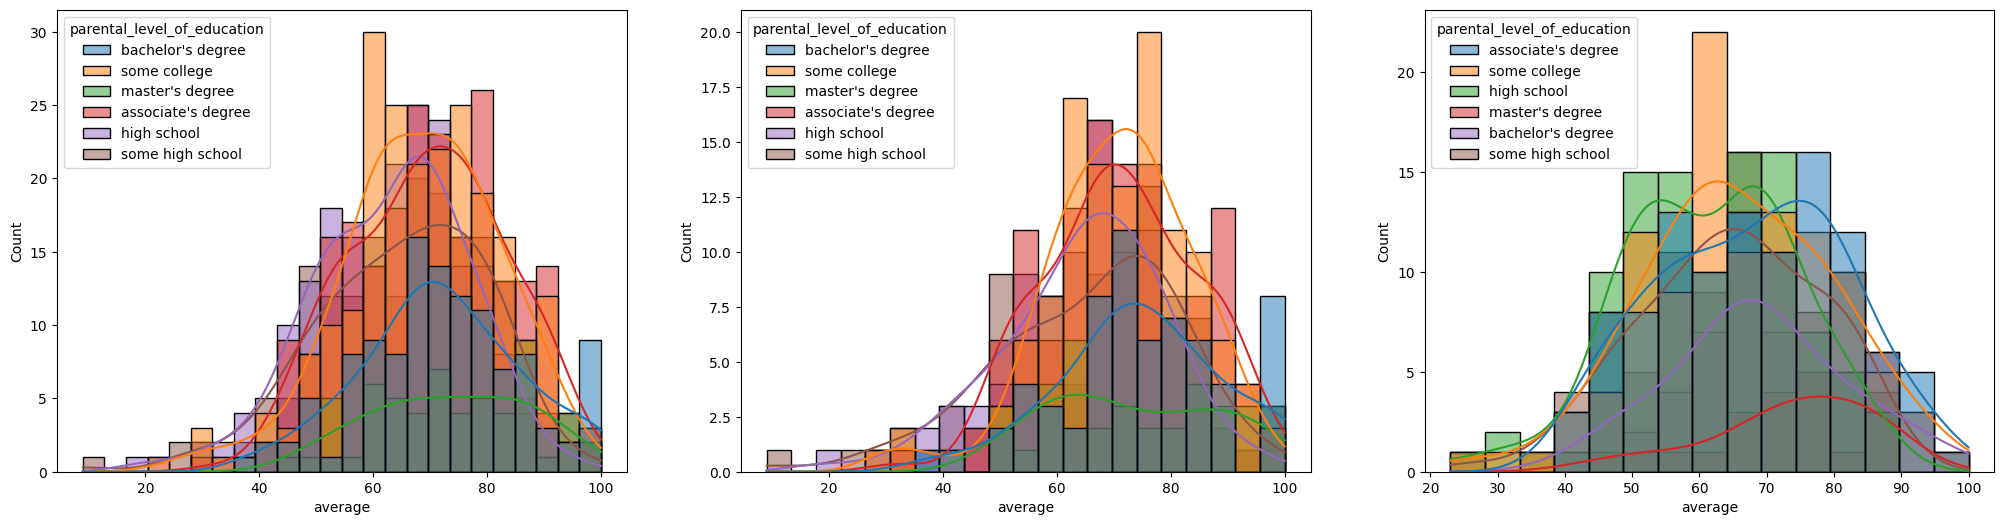

In [60]:
# Create the subplots
plt.subplots(1, 3, figsize=(25, 6))

# First subplot: all students and parental level of education
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
ax1.set_title('All Students')

# Second subplot: Female students and parental level of education
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
ax2.set_title('Female Students')

# Third subplot: Male students and parental level of education
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
ax3.set_title('Male Students')

# Display the plots
plt.show()

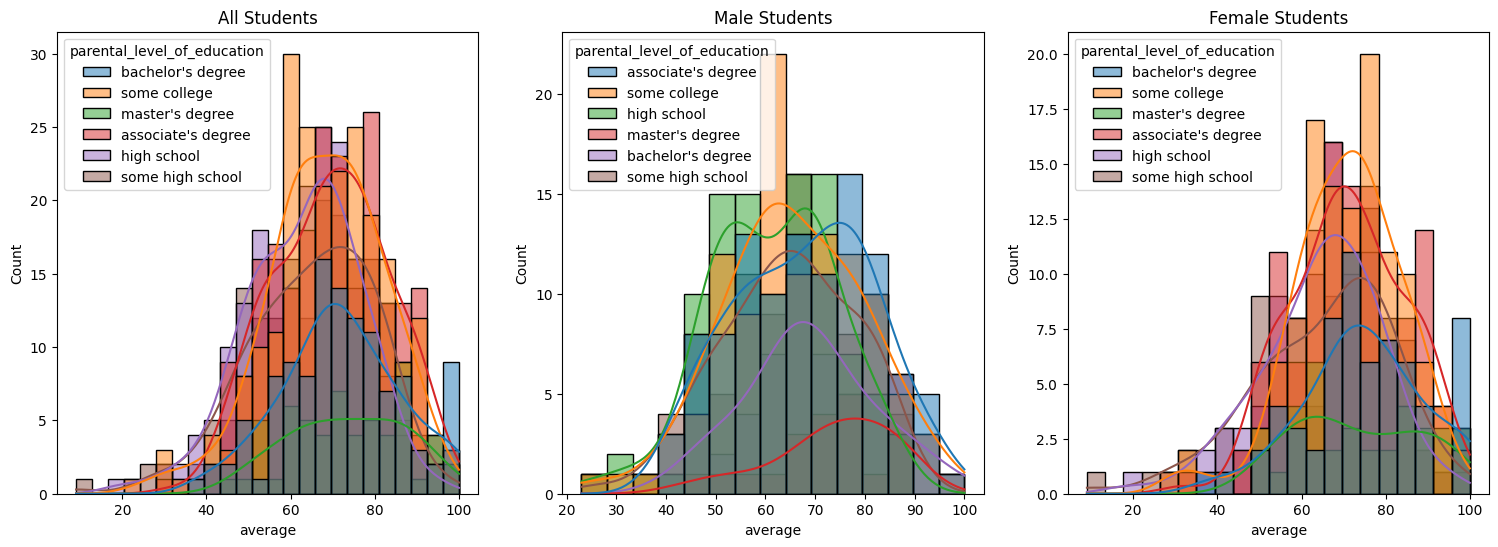

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax1 =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
ax1.set_title('All Students')

plt.subplot(142)
ax2 =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
ax2.set_title('Male Students')

plt.subplot(143)
ax3 =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
ax3.set_title('Female Students')

plt.show()

- In general, parent's education don't help students perform well
- However, parnts who completed associate's degrees, their children across both genders seem to do well


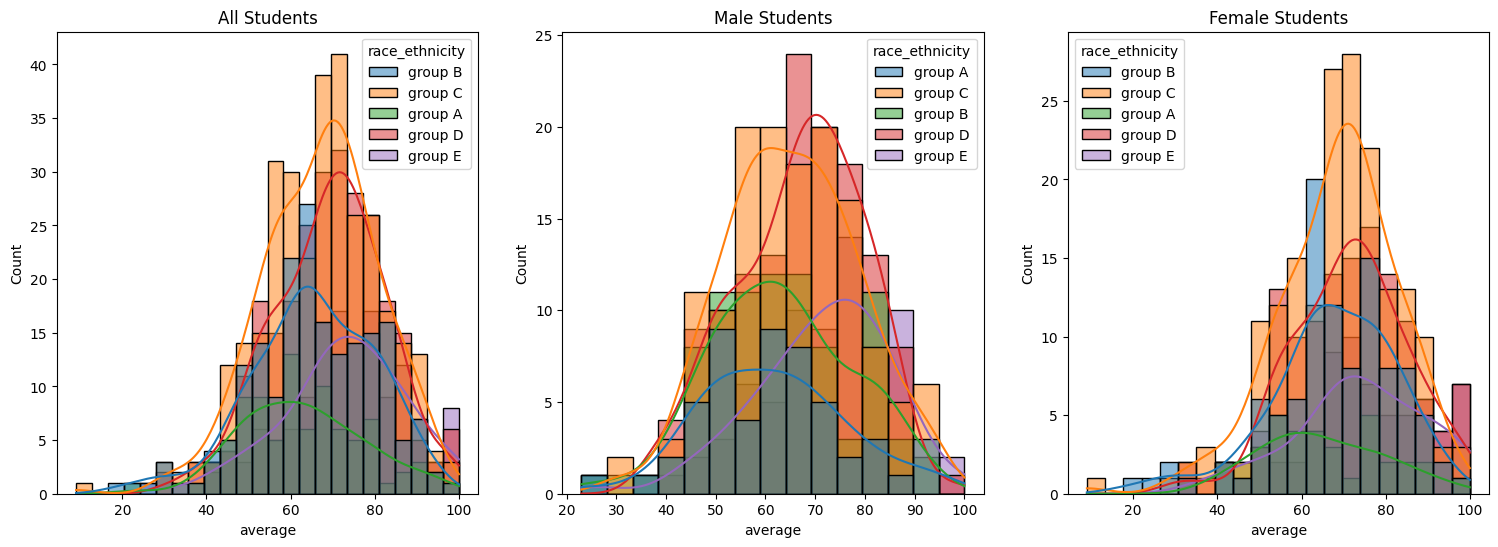

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax1 =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
ax1.set_title('All Students')

plt.subplot(142)
ax2 =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
ax2.set_title('Male Students')

plt.subplot(143)
ax3 =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
ax3.set_title('Female Students')

plt.show()

Students in groups A, B and E tend to perform poorly irrespective of gender

## 2) Max score of students across all 3 subjects


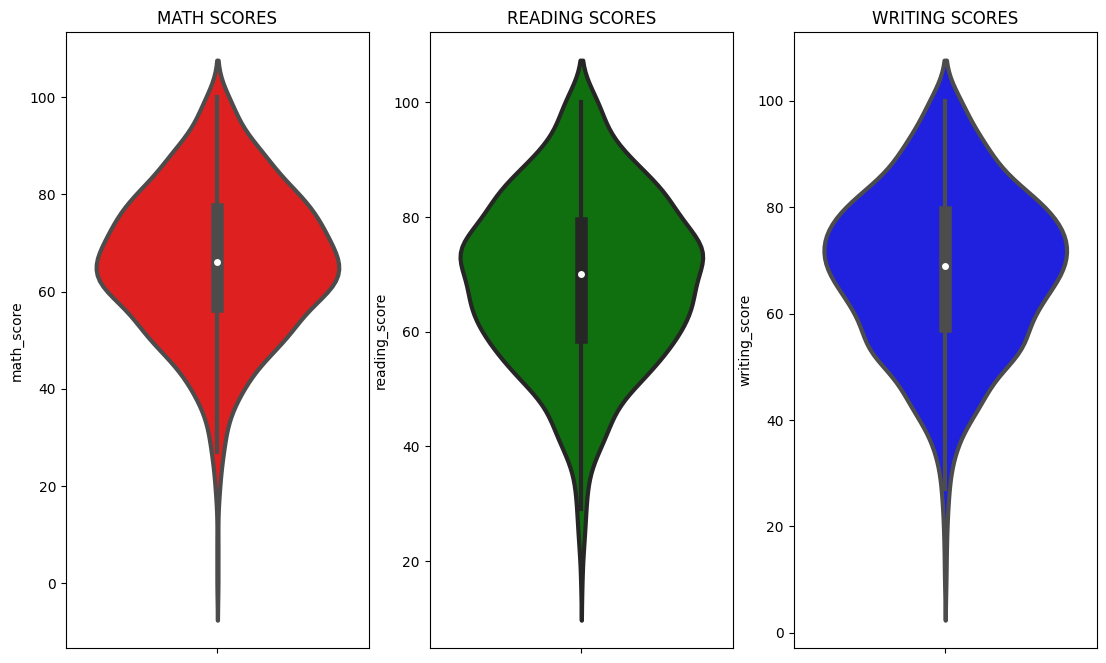

In [68]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Clear to see that most of the scores lie between 50-80 across all subjects

## 4.3 Multivariate analyses using pieplot

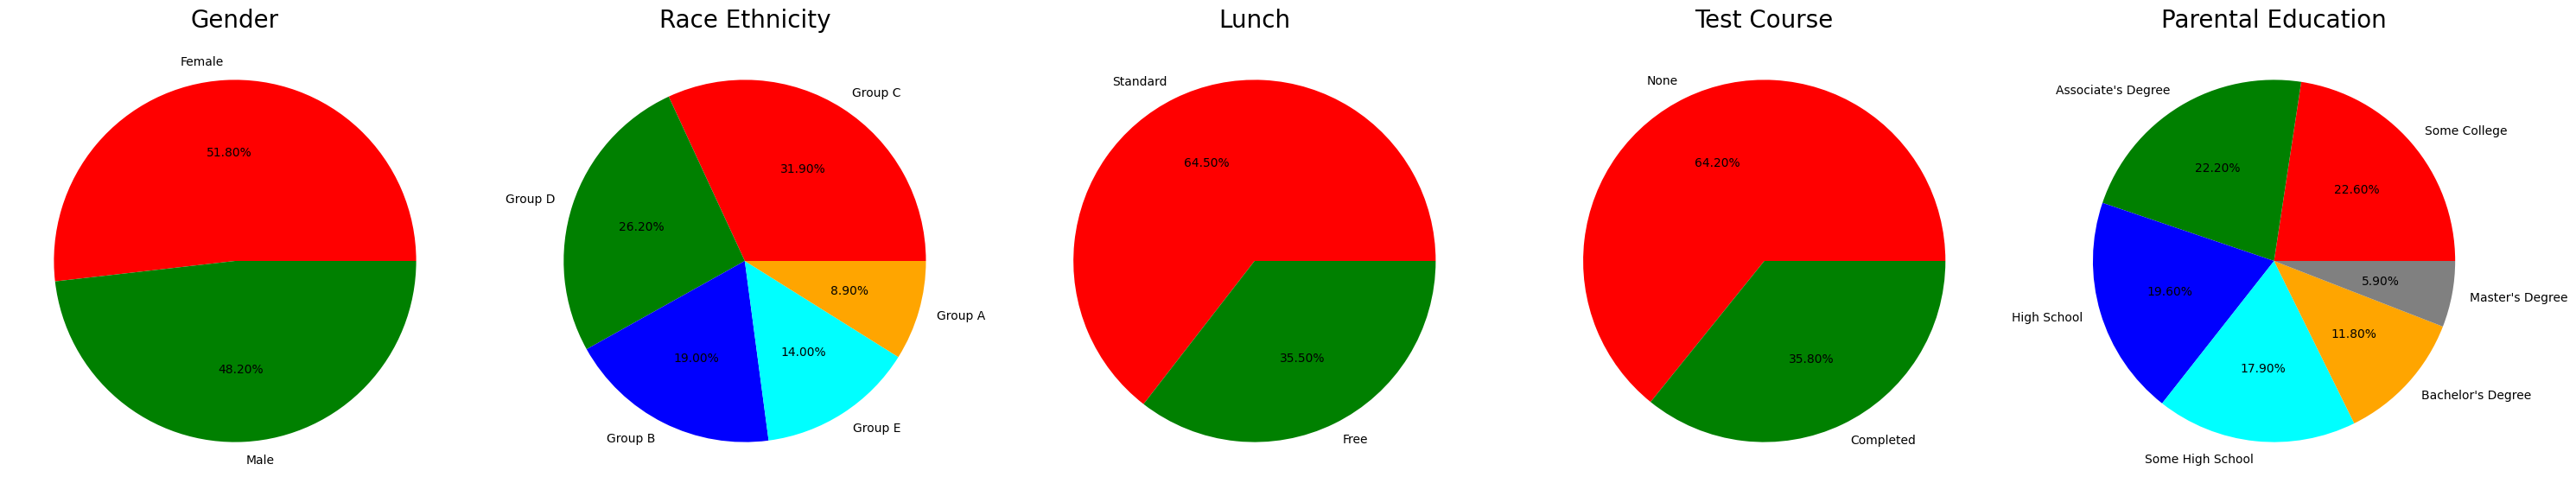

In [79]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

- Number of Male and Female students is almost equal
- Number of students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greatest followed closely by "Associate's Degree"

## 4.4 Feature visualisation

## 4.4.1 Gender


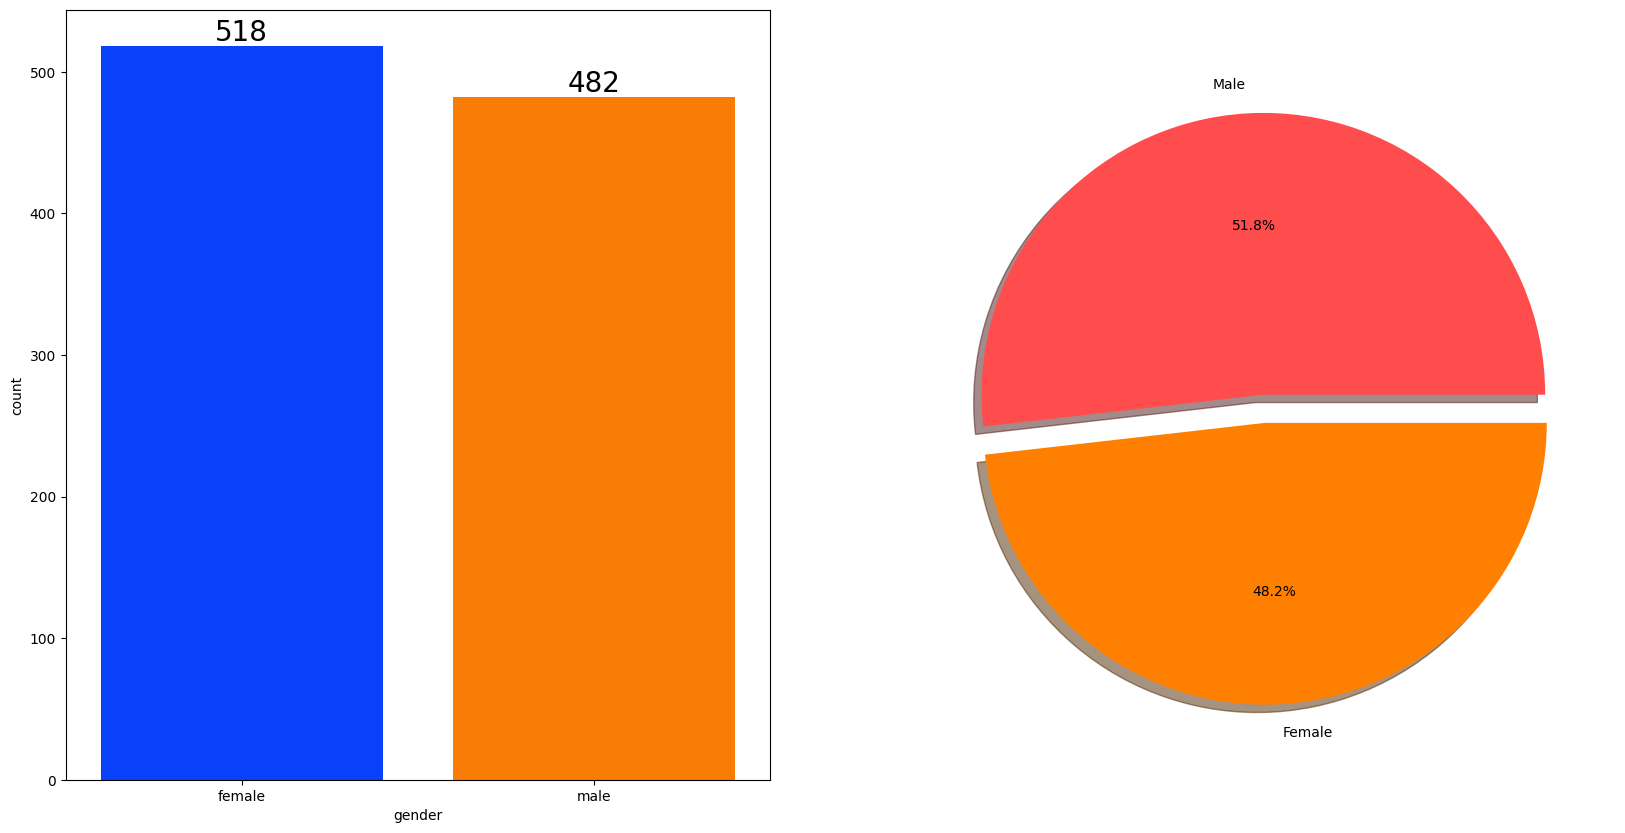

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Male/female distribution is balanced

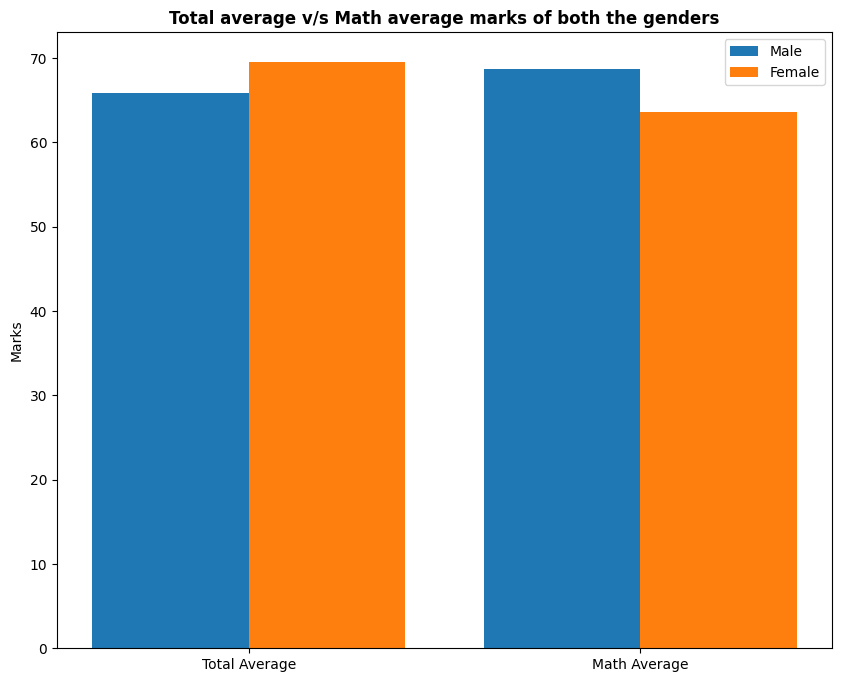

In [83]:
plt.figure(figsize=(10, 8))

gender_group = df.groupby('gender').mean()
X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Males score higher in maths, females score higher overall

## 4.4.2 Race/ethnicity

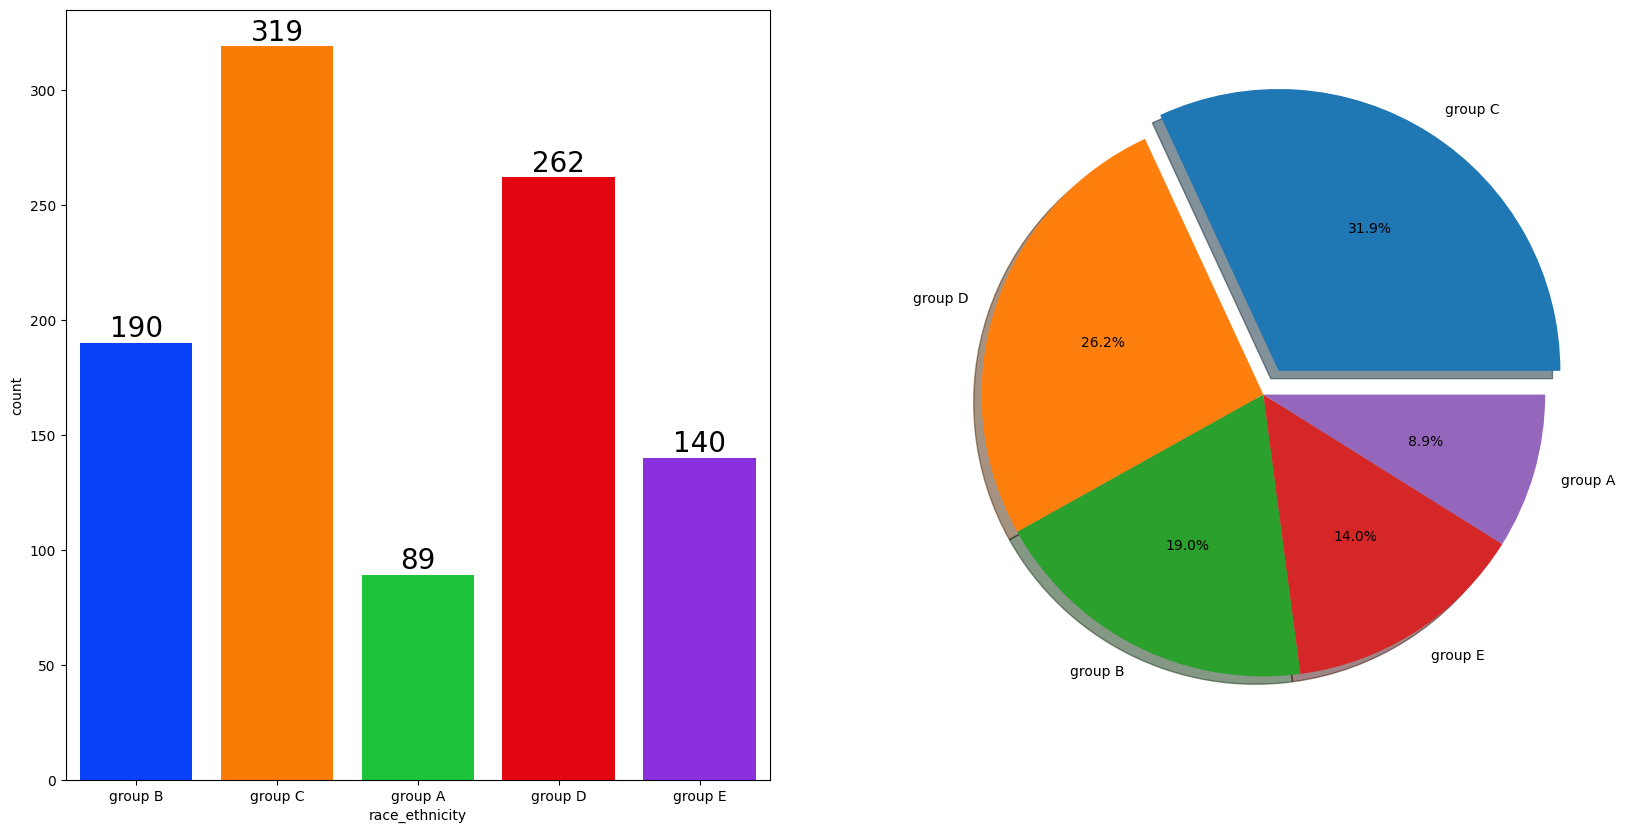

In [85]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   


Most students belong to groups C and D, least to A 

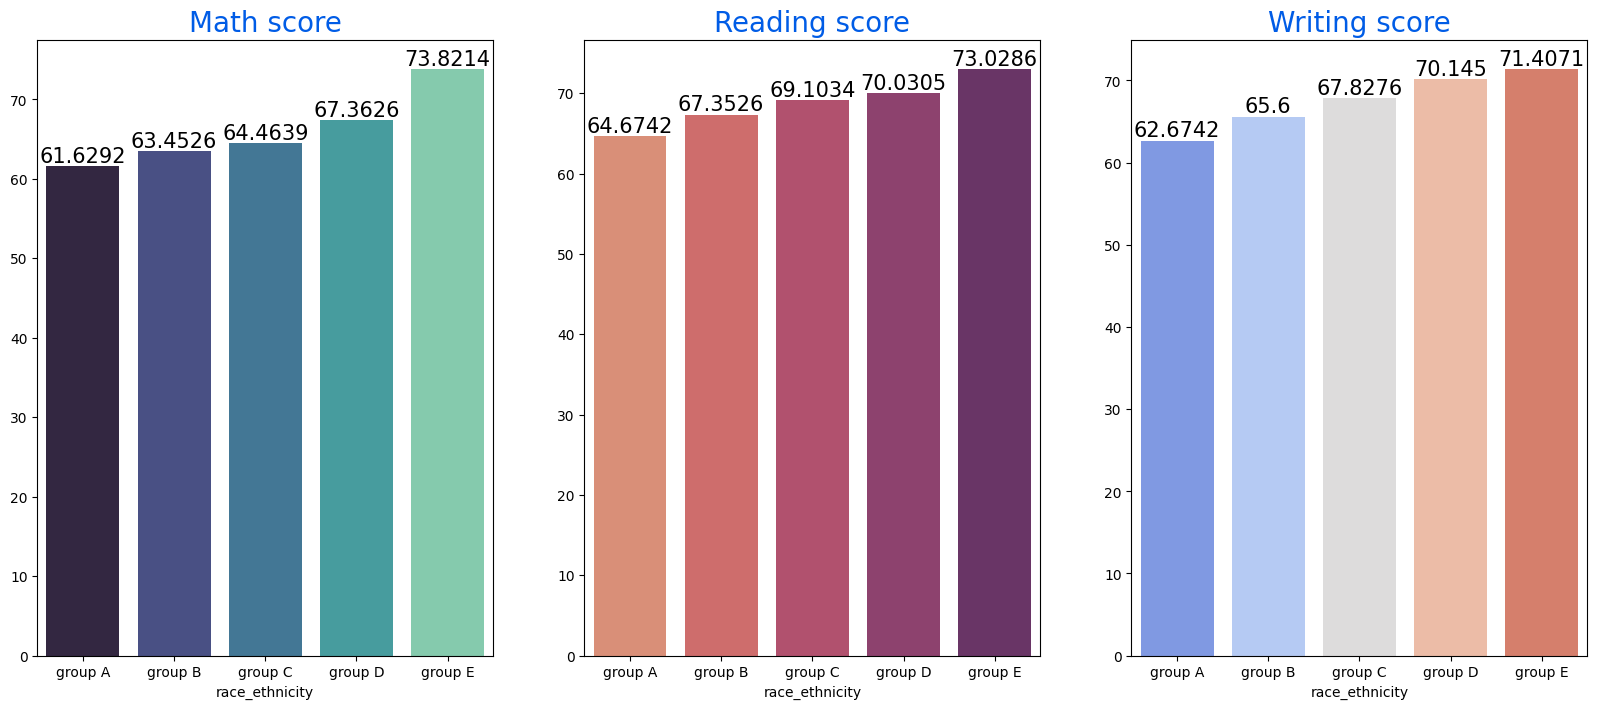

In [87]:
# find the mean scores across all subjects, grouping by race/ethnicity
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Common pattern across all 3 subjects:
- Group E scored the highest
- Group A scored the lowest

## 4.4.3 Parental level of education


In [89]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"

In [91]:
sns.countplot(df['parental_level_of_education'])

ValueError: could not convert string to float: "bachelor's degree"